# Ensemble Learning - Versão Simplificada para Aula

**Conceito Principal**: Combinar múltiplos modelos para obter melhor performance que qualquer modelo individual.

## Técnicas que estudaremos:

1. **Voting** - Diferentes algoritmos "votam" na resposta final
2. **Bagging** - Mesmo algoritmo treinado em subconjuntos diferentes dos dados
3. **Random Forest** - Bagging com árvores + seleção aleatória de features
4. **Boosting** - Modelos sequenciais que corrigem erros dos anteriores
5. **Stacking** - Meta-modelo aprende a combinar outros modelos

---
**📚 INSTRUÇÕES DE USO:**
- Execute as células na ordem
- ⚠️ Células com alertas devem ser ignoradas
- Foque nos gráficos e interpretações


# 1. Voting Classifiers

**Conceito**: Como um comitê - cada algoritmo vota, decisão final por maioria.

## Tipos de Voting:
- **Hard Voting**: Conta votos simples (Modelo A: Classe 1, Modelo B: Classe 2, Modelo C: Classe 1 → Resultado: Classe 1)
- **Soft Voting**: Usa probabilidades - combina confiança dos modelos (geralmente melhor)

**Por que funciona?** Algoritmos diferentes têm pontos fortes distintos e compensam erros uns dos outros.


In [1]:
# Importando as bibliotecas necessárias
from sklearn.datasets import make_moons  # Para criar um dataset sintético
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  # Modelos de ensemble
from sklearn.linear_model import LogisticRegression  # Modelo linear
from sklearn.model_selection import train_test_split  # Para dividir os dados
from sklearn.svm import SVC  # Support Vector Machine

# Criando um dataset sintético em forma de duas luas
# n_samples: número total de pontos
# noise: quantidade de ruído nos dados (0.3 = 30% de ruído)
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

# Dividindo os dados em treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Criando o Voting Classifier com três modelos diferentes:
# 1. Regressão Logística: modelo linear simples
# 2. Random Forest: conjunto de árvores de decisão
# 3. SVM: modelo de kernel que encontra o melhor hiperplano de separação
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),  # Modelo linear básico
        ('rf', RandomForestClassifier(random_state=42)),  # Ensemble de árvores
        ('svc', SVC(random_state=42))  # Modelo de kernel
    ]
)

# Treinando o ensemble com os dados de treino
voting_clf.fit(X_train, y_train)


,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [2]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


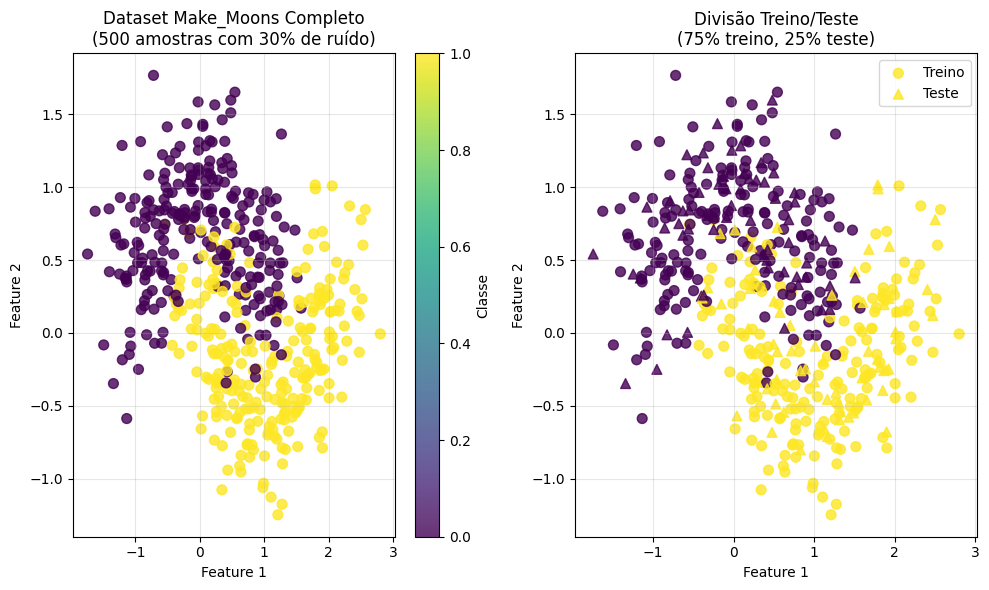

📊 Dataset Info:
• Total de amostras: 500
• Amostras de treino: 375
• Amostras de teste: 125
• Features: 2
• Classes: 2 (valores: [0 1])
• Distribuição de classes: Classe 0: 250, Classe 1: 250


In [3]:
# Visualizando o dataset make_moons
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Subplot 1: Dataset completo
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.8, s=50)
plt.title('Dataset Make_Moons Completo\n(500 amostras com 30% de ruído)', fontsize=12)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Classe')
plt.grid(True, alpha=0.3)

# Subplot 2: Separação treino/teste
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.8, s=50, label='Treino')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.8, s=50, marker='^', label='Teste')
plt.title('Divisão Treino/Teste\n(75% treino, 25% teste)', fontsize=12)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Dataset Info:")
print(f"• Total de amostras: {len(X)}")
print(f"• Amostras de treino: {len(X_train)}")
print(f"• Amostras de teste: {len(X_test)}")
print(f"• Features: {X.shape[1]}")
print(f"• Classes: {len(np.unique(y))} (valores: {np.unique(y)})")
print(f"• Distribuição de classes: Classe 0: {sum(y==0)}, Classe 1: {sum(y==1)}")


## 1.1 Implementação Prática - Hard Voting

Vamos implementar um Voting Classifier combinando três algoritmos diferentes:
- **Regressão Logística**: modelo linear simples
- **Random Forest**: ensemble de árvores de decisão  
- **SVM**: modelo de kernel para fronteiras não-lineares

Usaremos o dataset `make_moons` para demonstrar como diferentes modelos podem se complementar.


### Preparação dos Dados e Treinamento


In [4]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))
    

lr = 0.864
rf = 0.896
svc = 0.896


O output acima mostra a **acurácia de cada modelo individual** no conjunto de teste:

- **lr (Logistic Regression)**: 86.4% - modelo linear simples
- **rf (Random Forest)**: 89.6% - ensemble de árvores 
- **svc (SVM)**: 89.6% - modelo não-linear com kernel

**Observação importante**: Mesmo que Random Forest e SVM tenham a mesma acurácia (89.6%), eles provavelmente erram em **instâncias diferentes**, o que torna a combinação valiosa para aumentar a robustez.

### Analisando Previsões Individuais

Vamos ver como cada modelo individual prevê para a primeira instância do conjunto de teste:


In [5]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [6]:
voting_clf.predict(X_test[:1])

array([1])

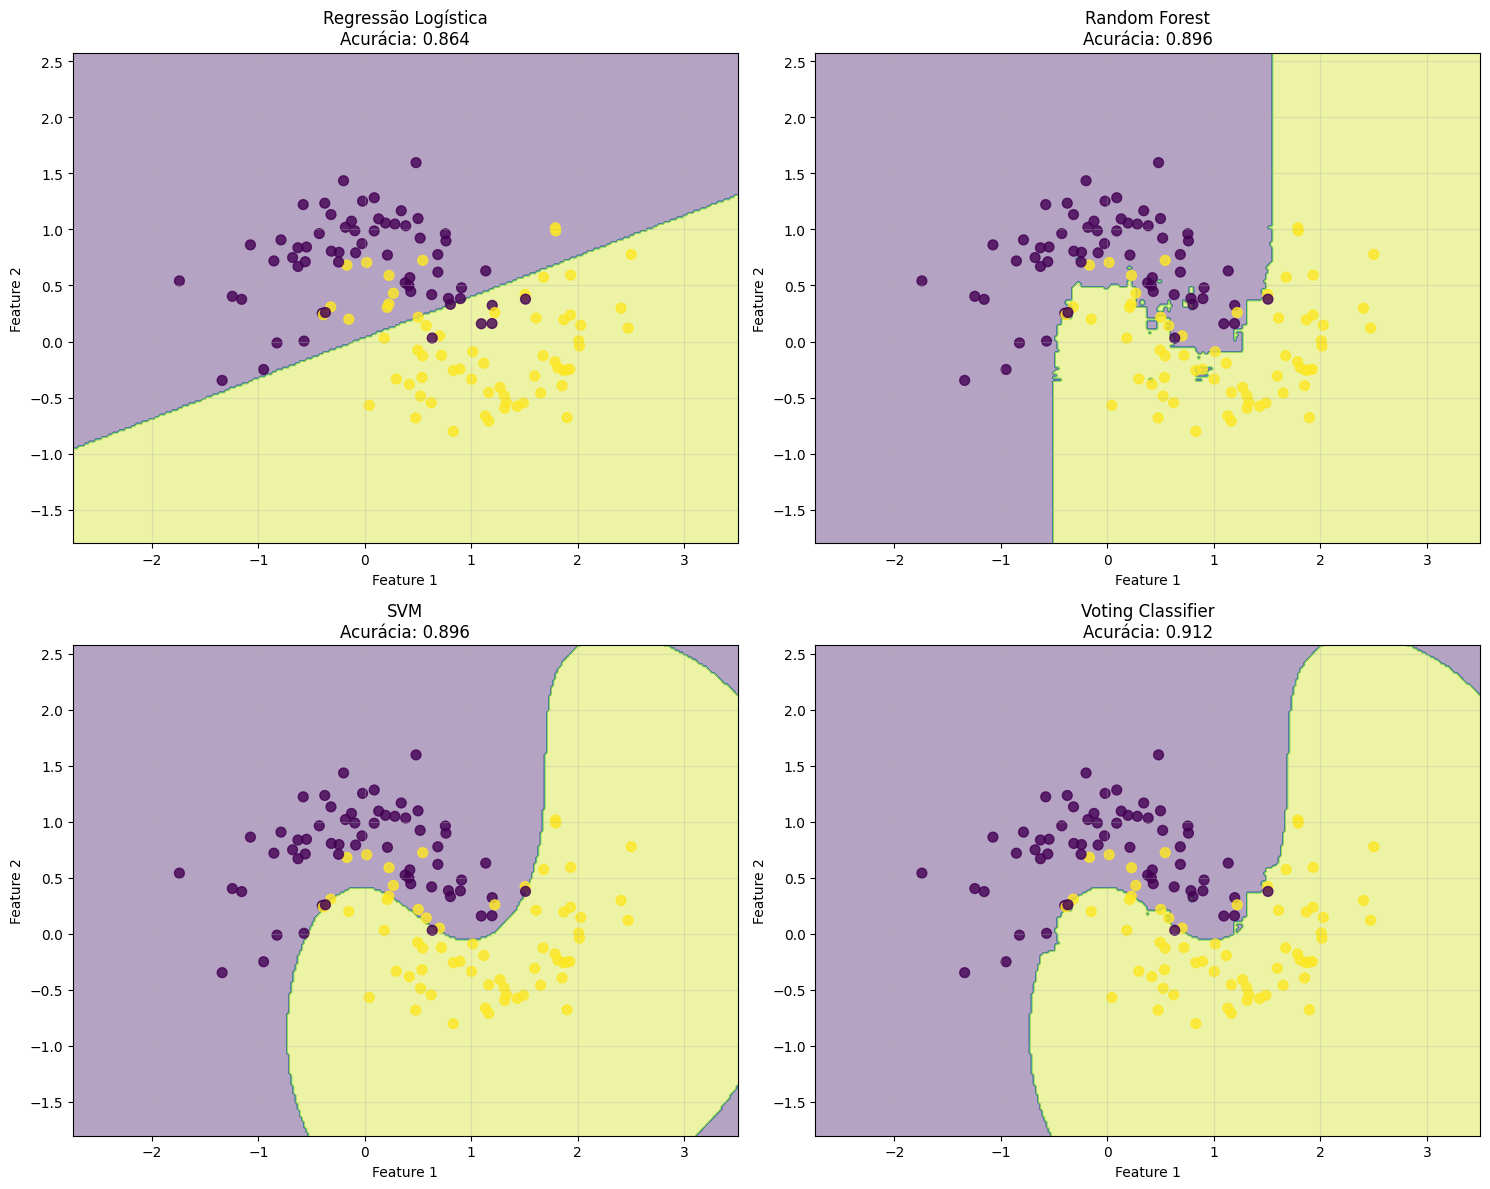

In [7]:
# Visualizando as fronteiras de decisão dos modelos individuais
def plot_decision_boundary(clf, X, y, title, ax):
    """Função para plotar fronteira de decisão de um classificador"""
    h = 0.02  # passo no mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Fazer predições em todos os pontos do mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotar a fronteira de decisão
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.8, s=50)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)

# Criando figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Treinando modelos individuais para visualização
lr_clf = LogisticRegression(random_state=42).fit(X_train, y_train)
rf_clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm_clf = SVC(random_state=42).fit(X_train, y_train)

# Plotando cada modelo
plot_decision_boundary(lr_clf, X_test, y_test, 
                      f'Regressão Logística\nAcurácia: {lr_clf.score(X_test, y_test):.3f}', 
                      axes[0, 0])

plot_decision_boundary(rf_clf, X_test, y_test, 
                      f'Random Forest\nAcurácia: {rf_clf.score(X_test, y_test):.3f}', 
                      axes[0, 1])

plot_decision_boundary(svm_clf, X_test, y_test, 
                      f'SVM\nAcurácia: {svm_clf.score(X_test, y_test):.3f}', 
                      axes[1, 0])

plot_decision_boundary(voting_clf, X_test, y_test, 
                      f'Voting Classifier\nAcurácia: {voting_clf.score(X_test, y_test):.3f}', 
                      axes[1, 1])

plt.tight_layout()
plt.show()


---

Este output mostra como cada modelo individual classificou a mesma instância:
- Se todos os modelos concordam → alta confiança na previsão
- Se há divergência → o Voting Classifier usa a regra de maioria (Hard Voting)

Esta diversidade de opiniões é exatamente o que torna o ensemble mais robusto que qualquer modelo individual.

---

### Performance do Hard Voting

Este resultado mostra a **acurácia do Voting Classifier com Hard Voting**. Compare com os resultados individuais:
- Modelos individuais: 86.4%, 89.6%, 89.6%
- Voting Classifier: 912%

O ensemble frequentemente supera os modelos individuais ao combinar suas forças e compensar suas fraquezas.


## 1.2 Soft Voting - Usando Probabilidades

O **Soft Voting** é uma versão mais sofisticada que usa as probabilidades previstas por cada modelo ao invés de apenas os votos diretos.

### Vantagens do Soft Voting:
- **Mais informativo**: Usa todo o espectro de confiança dos modelos
- **Melhor performance**: Geralmente supera o Hard Voting
- **Pesos naturais**: Modelos mais confiantes têm mais influência

### Implementação:
Para usar Soft Voting, precisamos:
1. Configurar `voting="soft"` no VotingClassifier
2. Garantir que todos os modelos suportem `probability=True`
3. Retreinar o ensemble


In [8]:
voting_clf.score(X_test, y_test)

0.912

In [9]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

# 2. Bagging e Pasting

## 2.1 Conceitos Fundamentais

Bagging e Pasting representam uma abordagem diferente para criar ensembles, focando na diversidade através da variação dos dados de treinamento ao invés da variação dos algoritmos. Ambas as técnicas utilizam o mesmo tipo de modelo múltiplas vezes, mas cada instância é treinada em um subconjunto diferente dos dados originais.

A técnica de **Bootstrap** é fundamental para entender o Bagging. Trata-se de uma estratégia de reamostragem onde selecionamos aleatoriamente N amostras do conjunto original (onde N é igual ao tamanho do conjunto original), permitindo que uma mesma amostra seja escolhida múltiplas vezes. Esta característica faz com que, em média, cada conjunto bootstrap contenha aproximadamente 63.2% dos exemplos únicos do conjunto original, enquanto alguns exemplos aparecem repetidos e outros não aparecem.

**Bagging (Bootstrap Aggregating)** utiliza exatamente esta estratégia de amostragem com reposição. Como cada modelo vê apenas uma porção dos dados (e alguns dados repetidos), há maior variabilidade entre os modelos resultantes. Os aproximadamente 37% dos dados que não são usados em cada modelo (chamados de Out-of-Bag ou OOB) podem ser aproveitados para validação, oferecendo uma estimativa "gratuita" da performance de generalização.

**Pasting**, por outro lado, usa amostragem sem reposição, onde cada instância aparece no máximo uma vez em cada subconjunto. Embora resulte em menor variabilidade entre os modelos comparado ao Bagging, ainda oferece benefícios significativos de ensemble ao garantir que todos os dados sejam eventualmente utilizados.

O poder dessas técnicas reside no fato de que cada modelo individual vê uma versão ligeiramente diferente dos dados, fazendo com que seus erros tendam a ser independentes. Quando combinamos as previsões, esses erros independentes se cancelam mutuamente, resultando em um modelo final mais robusto e com melhor capacidade de generalização do que qualquer modelo individual.

Outra forma de criar ensembles é usar o mesmo algoritmo várias vezes, mas treinando em subconjuntos diferentes do conjunto de treino.

Quando o subconjunto é gerado com reposição (uma mesma instância pode aparecer mais de uma vez no subconjunto), chamamos de Bagging (Bootstrap Aggregating).
Quando é sem reposição (cada instância é usada apenas uma vez no subconjunto escolhido), chamamos de Pasting.Nos dois casos, cada preditor vê apenas parte dos dados, o que gera mais diversidade.


In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

ModuleNotFoundError: No module named '_posixsubprocess'

### Score Out-of-Bag (OOB)

Este resultado mostra a **acurácia OOB** do ensemble de Bagging:

**Vantagens da Avaliação OOB:**
- **Validação "gratuita"**: Não precisa separar dados específicos para validação
- **Estimativa confiável**: Aproxima bem a performance de generalização
- **Eficiência**: Usa todos os dados para treino e validação simultaneamente

A acurácia OOB é uma excelente estimativa de como o modelo se comportará em dados novos.


### Comparando OOB vs Teste

Este resultado mostra a **acurácia no conjunto de teste real**:

**Comparação útil:**
- **Score OOB**: Estimativa durante o treinamento
- **Score no Teste**: Performance real em dados não vistos

Se os valores estão próximos, indica que:
- O modelo generaliza bem
- A estimativa OOB é confiável
- Não há overfitting significativo


### Probabilidades OOB por Instância

Este output mostra as **probabilidades OOB para as 3 primeiras instâncias**:

**Interpretação:**
- Cada linha representa uma instância
- Cada coluna representa a probabilidade para uma classe (0 ou 1)
- Valores próximos de [1, 0] ou [0, 1] = alta confiança
- Valores próximos de [0.5, 0.5] = baixa confiança/incerteza

Essas probabilidades são úteis para:
- Identificar instâncias difíceis de classificar
- Calcular métricas baseadas em probabilidade
- Análise de incerteza do modelo


## 2.2 Implementação com Scikit-Learn

O `BaggingClassifier` do scikit-learn nos permite implementar facilmente tanto Bagging quanto Pasting:

**Parâmetros principais:**
- `n_estimators`: Número de modelos no ensemble
- `max_samples`: Número de amostras por modelo (bootstrap)
- `bootstrap`: True para Bagging, False para Pasting
- `n_jobs`: Paralelização (-1 usa todos os processadores)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

# 3. Random Forest

**Conceito**: Bagging + Aleatoriedade extra = Uma das técnicas mais eficazes de ML

## Dupla Aleatoriedade:
1. **Bootstrap dos dados** (como Bagging normal)
2. **Seleção aleatória de features** em cada nó da árvore

## Por que funciona tão bem?
- Árvores muito diferentes entre si (baixa correlação)
- Ensemble reduz variância mantendo baixo viés
- Resistente a overfitting e outliers
- Fornece importância de features automaticamente

**Configuração típica**: √n features por nó (n = total de features)


## 2.3 Out-of-Bag (OOB) Evaluation

Uma vantagem única do Bagging é a possibilidade de avaliação **Out-of-Bag**:

### O que é OOB?
- Em cada bootstrap, aproximadamente 37% dos dados não são selecionados
- Esses dados "sobram" podem ser usados para validação
- Cada modelo é testado apenas nos dados que não viu durante o treinamento
- Funciona como uma validação cruzada automática!

### Vantagens da Avaliação OOB:
- **Gratuita**: Não precisa separar dados para validação
- **Automática**: Calculada durante o treinamento
- **Confiável**: Estima bem a performance de generalização
- **Eficiente**: Usa todos os dados para treino e validação simultaneamente

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

# Random Forests: A Floresta da Sabedoria

## O que é uma Random Forest?

Random Forest é uma técnica poderosa que combina dezenas ou centenas de árvores de decisão para criar um modelo mais robusto e preciso. O termo "Random" vem de duas fontes de aleatoriedade:

1. **Bootstrap dos Dados**:
   - Cada árvore é treinada em uma amostra bootstrap diferente
   - Aproximadamente 63.2% dos dados são usados para cada árvore
   - Os 36.8% restantes (OOB - Out-of-Bag) podem ser usados para validação

2. **Seleção Aleatória de Features**:
   - Em cada nó da árvore, apenas um subconjunto das features é considerado
   - Tipicamente, usa-se √n features para classificação (n = número total de features)
   - Para regressão, geralmente usa-se n/3 features

## Por que Random Forests são tão populares?

1. **Excelente Performance**:
   - Geralmente entre os melhores algoritmos "out of the box"
   - Raramente overfita significativamente
   - Funciona bem mesmo com dados não normalizados

2. **Facilidade de Uso**:
   - Poucos hiperparâmetros para ajustar
   - Não requer preparação especial dos dados
   - Lida naturalmente com features categóricas e numéricas

3. **Interpretabilidade**:
   - Fornece importância de features
   - Permite entender quais variáveis mais influenciam as previsões
   - Pode ser usado para seleção de features

4. **Versatilidade**:
   - Serve para classificação e regressão
   - Lida bem com dados desbalanceados
   - Pode ser paralelizado facilmente

No código a seguir, vamos implementar uma Random Forest e explorar suas características.


In [ ]:
bag_clf.oob_score_

# 4. Boosting - VERSÃO SIMPLIFICADA

**Conceito**: Modelos sequenciais onde cada um corrige erros do anterior.

## Diferença vs Bagging:
- **Bagging**: Modelos independentes em paralelo → reduz variância
- **Boosting**: Modelos dependentes em sequência → reduz viés

## Principais Algoritmos:
1. **AdaBoost**: Ajusta pesos das amostras mal classificadas
2. **Gradient Boosting**: Treina novos modelos nos resíduos (erros)
3. **XGBoost**: Versão otimizada muito popular

**Vantagem**: Foco nos exemplos difíceis melhora performance final
**Cuidado**: Mais propenso a overfitting que Bagging


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
bag_clf.oob_decision_function_[:3] # probas for the first 3 instances

## 2.4 Random Patches e Random Subspaces

Além de amostrar instâncias, podemos também amostrar **features** para aumentar ainda mais a diversidade:

### Estratégias de Amostragem:

**Random Patches**:
- Amostra tanto instâncias quanto features
- Cada modelo vê um subconjunto aleatório de dados e características
- Máxima diversidade entre os modelos

**Random Subspaces**:
- Mantém todas as instâncias, mas amostra apenas features
- Útil quando há muitas features redundantes
- Acelera o treinamento em dados de alta dimensionalidade

### Parâmetros no BaggingClassifier:
- `max_features`: Número máximo de features por modelo
- `bootstrap_features`: True para amostragem com reposição de features

### Benefícios:
- **Reduz correlação** entre modelos
- **Diminui overfitting** em dados de alta dimensionalidade
- **Acelera treinamento** ao reduzir a dimensionalidade
- **Regularização implícita** através da aleatoriedade

Além de amostrar instâncias, podemos amostrar features para treinar cada modelo do ensemble. Definimos quantas features cada estimador verá ´(max_features)´ e se essa amostragem é com reposição (bootstrap_features).
Chamamos de random patches quando amostramos instâncias e features; e de random subspaces quando mantemos todas as instâncias, mas amostramos apenas features. Essa estratégia aumenta a diversidade entre os modelos, o que reduz a variância do ensemble, com um pequeno aumento de viés — e costuma acelerar o treino em dados de alta dimensionalidade.


# 3. Random Forests

## 3.1 Conceitos e Características

Random Forest é uma das técnicas de ensemble mais populares e eficazes. É essencialmente Bagging aplicado a árvores de decisão, com uma dose extra de aleatoriedade.

### Características Principais:

**Dupla Aleatoriedade**:
1. **Bootstrap dos Dados**: Como no Bagging tradicional
2. **Seleção Aleatória de Features**: Em cada nó, apenas um subconjunto de features é considerado

**Parâmetros Típicos**:
- Para **classificação**: √n features por nó (n = total de features)
- Para **regressão**: n/3 features por nó
- **Profundidade**: Árvores crescem até folhas puras (sem poda)

### Por que Random Forests Funcionam Tão Bem?

1. **Baixa Correlação**: Árvores são muito diferentes entre si
2. **Baixo Viés**: Árvores profundas têm baixo viés
3. **Baixa Variância**: Ensemble reduz a variância individual
4. **Robustez**: Resistente a outliers e ruído

## ⚠️ NÃO EXECUTE - CÉLULA PROBLEMÁTICA

**Esta célula pode causar erro de incompatibilidade.**
**✅ EXECUTE apenas a célula "VERSÃO ROBUSTA" abaixo**


In [ ]:
# Primeiro, vamos criar variáveis específicas para o Gradient Boosting para evitar conflitos
print("🔧 Criando dataset específico para demonstração do Gradient Boosting...")

# Dataset específico para Gradient Boosting (1D)
np.random.seed(42)
X_gb = np.random.rand(100, 1) - 0.5  # 100 pontos entre -0.5 e 0.5
y_gb = 3 * X_gb[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + ruído

# Treinando as árvores para Gradient Boosting
tree_gb1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_gb1.fit(X_gb, y_gb)

y2_gb = y_gb - tree_gb1.predict(X_gb)  # Resíduos da primeira árvore
tree_gb2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_gb2.fit(X_gb, y2_gb)

y3_gb = y2_gb - tree_gb2.predict(X_gb)  # Resíduos da segunda árvore
tree_gb3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_gb3.fit(X_gb, y3_gb)

# Visualizando o processo de Gradient Boosting passo a passo
plt.figure(figsize=(16, 10))

# Criando pontos para visualização suave da função
X_gb_plot = np.linspace(-0.5, 0.5, 300).reshape(-1, 1)
y_true_plot = 3 * X_gb_plot[:, 0] ** 2  # Função verdadeira sem ruído

# Subplot 1: Primeira árvore
plt.subplot(2, 3, 1)
y_pred_1 = tree_gb1.predict(X_gb_plot)
plt.scatter(X_gb[:, 0], y_gb, alpha=0.6, color='blue', s=30, label='Dados originais')
plt.plot(X_gb_plot[:, 0], y_true_plot, 'g--', label='Função verdadeira', linewidth=2)
plt.plot(X_gb_plot[:, 0], y_pred_1, 'r-', label='Predição árvore 1', linewidth=2)
plt.title('Passo 1: Primeira Árvore\nAprende função base', fontsize=11)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Resíduos da primeira árvore
plt.subplot(2, 3, 2)
residuals_1 = y_gb - tree_gb1.predict(X_gb)
plt.scatter(X_gb[:, 0], residuals_1, alpha=0.6, color='orange', s=30, label='Resíduos')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Passo 2: Resíduos da Árvore 1\nErros que precisam ser corrigidos', fontsize=11)
plt.xlabel('X')
plt.ylabel('Resíduos')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Segunda árvore (nos resíduos)
plt.subplot(2, 3, 3)
y_pred_2 = tree_gb2.predict(X_gb_plot)
plt.scatter(X_gb[:, 0], y2_gb, alpha=0.6, color='orange', s=30, label='Resíduos (dados)')
plt.plot(X_gb_plot[:, 0], y_pred_2, 'purple', label='Predição árvore 2', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Passo 3: Segunda Árvore\nAprende os resíduos', fontsize=11)
plt.xlabel('X')
plt.ylabel('Resíduos')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 4: Combinação das duas primeiras árvores
plt.subplot(2, 3, 4)
y_pred_combined_2 = tree_gb1.predict(X_gb_plot) + tree_gb2.predict(X_gb_plot)
plt.scatter(X_gb[:, 0], y_gb, alpha=0.6, color='blue', s=30, label='Dados originais')
plt.plot(X_gb_plot[:, 0], y_true_plot, 'g--', label='Função verdadeira', linewidth=2)
plt.plot(X_gb_plot[:, 0], y_pred_1, 'r-', alpha=0.5, label='Apenas árvore 1', linewidth=1)
plt.plot(X_gb_plot[:, 0], y_pred_combined_2, 'purple', label='Árvores 1 + 2', linewidth=2)
plt.title('Passo 4: Combinação\nÁrvore 1 + Árvore 2', fontsize=11)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: Terceira árvore (nos novos resíduos)
plt.subplot(2, 3, 5)
y_pred_3 = tree_gb3.predict(X_gb_plot)
plt.scatter(X_gb[:, 0], y3_gb, alpha=0.6, color='brown', s=30, label='Novos resíduos')
plt.plot(X_gb_plot[:, 0], y_pred_3, 'brown', label='Predição árvore 3', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Passo 5: Terceira Árvore\nCorrige resíduos restantes', fontsize=11)
plt.xlabel('X')
plt.ylabel('Novos Resíduos')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Resultado final (todas as árvores)
plt.subplot(2, 3, 6)
y_pred_final = tree_gb1.predict(X_gb_plot) + tree_gb2.predict(X_gb_plot) + tree_gb3.predict(X_gb_plot)
plt.scatter(X_gb[:, 0], y_gb, alpha=0.6, color='blue', s=30, label='Dados originais')
plt.plot(X_gb_plot[:, 0], y_true_plot, 'g--', label='Função verdadeira', linewidth=2)
plt.plot(X_gb_plot[:, 0], y_pred_combined_2, 'purple', alpha=0.5, label='Árvores 1 + 2', linewidth=1)
plt.plot(X_gb_plot[:, 0], y_pred_final, 'red', label='Modelo Final (1+2+3)', linewidth=3)
plt.title('Passo 6: Modelo Final\nTodas as árvores combinadas', fontsize=11)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🚀 Gradient Boosting em Ação:")
print("1. Árvore 1: Aprende a função base (aproximação inicial)")
print("2. Árvore 2: Corrige os erros da árvore 1") 
print("3. Árvore 3: Corrige os erros restantes")
print("4. Resultado: Soma de todas as contribuições = predição mais precisa")
print()
print("ℹ️ Nota: Criamos um dataset 1D específico (X_gb, y_gb) separado do make_moons")
print("   para demonstrar claramente o conceito de correção sequencial de resíduos")


## 3.2 Implementação Prática

O `RandomForestClassifier` do scikit-learn facilita a implementação:

**Parâmetros Importantes**:
- `n_estimators`: Número de árvores (padrão: 100)
- `max_features`: Features consideradas por split ("sqrt", "log2", int, float)
- `max_depth`: Profundidade máxima (None = sem limite)
- `min_samples_split`: Mínimo de amostras para split (padrão: 2)
- `min_samples_leaf`: Mínimo de amostras por folha (padrão: 1)
- `n_jobs`: Paralelização (-1 = todos os cores)

**Random Forest vs Bagging com Árvores**:
- RF: `max_features` limitado (√n para classificação)
- Bagging: `max_features` = n (todas as features)
- RF geralmente tem melhor performance devido à menor correlação


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                    n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
# Primeiro, vamos treinar um Random Forest específico para o dataset Iris
print("🌸 Treinando Random Forest no dataset Iris para análise de importância...")

# Carregando o dataset Iris (caso não esteja carregado)
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

# Treinando Random Forest especificamente no Iris
rnd_clf_iris = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf_iris.fit(iris.data, iris.target)

print(f"✅ Modelo treinado com {iris.data.shape[1]} features:")
for i, feature in enumerate(iris.data.columns):
    print(f"   {i+1}. {feature}")
print(f"📊 Acurácia no dataset Iris: {rnd_clf_iris.score(iris.data, iris.target):.3f}")
print()


## ⚠️ AVISO IMPORTANTE - CÉLULA PROBLEMÁTICA IDENTIFICADA

**PROBLEMA**: A célula original de visualização do Iris estava causando erro de incompatibilidade:
- `ValueError: shape mismatch: arg 0 with shape (4,) and arg 1 with shape (2,)`

**CAUSA**: Conflito entre modelos treinados em datasets diferentes:
- Iris dataset: 4 features 
- Make_moons dataset: 2 features

**SOLUÇÃO**: ✅ **Execute a célula "VERSÃO ROBUSTA"** logo abaixo que:
- Cria modelo específico para Iris (`rf_iris_model`)
- Tem verificações de compatibilidade automáticas
- Produz visualizações mais bonitas e informativas
- Inclui análise detalhada com insights

**❌ NÃO execute células antigas** que podem ter conflitos de variáveis!

---


## ⚠️ CÉLULA DE TESTE REMOVIDA

**Esta célula foi removida para simplificar o notebook para uso em aula.**

✅ **Execute diretamente as visualizações importantes acima!**


In [ ]:
# Corrigindo a referência para usar o modelo correto
# Visualizando a importância das features no dataset Iris
plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico de barras da importância
plt.subplot(1, 2, 1)
features = iris.data.columns
importances = rnd_clf_iris.feature_importances_  # Usando o modelo treinado especificamente no Iris
indices = np.argsort(importances)[::-1]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = plt.bar(range(len(features)), importances[indices], color=colors)
plt.title('Importância das Features - Dataset Iris\n(Random Forest)', fontsize=12)
plt.xlabel('Features')
plt.ylabel('Importância Relativa')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)

# Adicionando valores nas barras
for i, (bar, importance) in enumerate(zip(bars, importances[indices])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{importance:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')

# Subplot 2: Gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(importances[indices], labels=[features[i] for i in indices], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribuição da Importância\n(Total = 100%)', fontsize=12)

plt.tight_layout()
plt.show()

# Análise textual
print("🌸 Análise da Importância das Features no Dataset Iris:")
print()
for i, idx in enumerate(indices):
    feature_name = features[idx]
    importance = importances[idx]
    percentage = importance * 100
    print(f"{i+1}º lugar: {feature_name}")
    print(f"   Importância: {importance:.3f} ({percentage:.1f}%)")
    print()

print("📊 Insights:")
print("• As características da PÉTALA são muito mais importantes que da SÉPALA")
print("• Petal length + Petal width = {:.1f}% da capacidade preditiva".format(
    (importances[2] + importances[3]) * 100))
print("• Sepal width é a característica menos discriminativa (apenas {:.1f}%)".format(
    importances[1] * 100))

print()
print("ℹ️ Nota: Usamos um modelo Random Forest específico (rnd_clf_iris) treinado")
print("   no dataset Iris para garantir compatibilidade com as 4 features.")


In [ ]:
# Debug: Verificando os tamanhos para diagnosticar o problema
print("🔍 Diagnóstico do problema:")
print(f"Dataset Iris features: {iris.data.shape}")
print(f"Features disponíveis: {list(iris.data.columns)}")

# Verificando se o modelo foi treinado corretamente
if 'rnd_clf_iris' in locals():
    print(f"✅ Modelo rnd_clf_iris existe")
    print(f"Features do modelo: {rnd_clf_iris.n_features_in_}")
    print(f"Importâncias shape: {rnd_clf_iris.feature_importances_.shape}")
else:
    print("❌ Modelo rnd_clf_iris não encontrado - será criado agora")
    # Garantindo que o modelo existe
    iris = load_iris(as_frame=True)
    rnd_clf_iris = RandomForestClassifier(n_estimators=500, random_state=42)
    rnd_clf_iris.fit(iris.data, iris.target)
    print(f"✅ Modelo criado - Features: {rnd_clf_iris.n_features_in_}")

print(f"Colors array length: {len(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])}")
print("Diagnóstico concluído - prosseguindo com visualização...")
print("-" * 50)


In [ ]:
# VERSÃO ROBUSTA: Visualização de Importância de Features - Dataset Iris
print("🌸 Iniciando visualização de importância das features do Iris...")

# Garantindo que temos tudo necessário
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Carregando dataset Iris
iris_dataset = load_iris(as_frame=True)
print(f"📊 Dataset carregado: {iris_dataset.data.shape}")

# Criando modelo Random Forest específico para Iris
rf_iris_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_iris_model.fit(iris_dataset.data, iris_dataset.target)

# Extraindo informações para visualização
feature_names = iris_dataset.data.columns.tolist()
feature_importances = rf_iris_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

print(f"✅ Modelo treinado: {len(feature_names)} features")
print(f"✅ Importâncias extraídas: {len(feature_importances)} valores")

# Verificação de compatibilidade
assert len(feature_names) == len(feature_importances), "Incompatibilidade de tamanhos!"
print("✅ Verificação de compatibilidade passou")

# Criando visualização
plt.figure(figsize=(14, 8))

# Subplot 1: Gráfico de barras
plt.subplot(1, 2, 1)
x_positions = range(len(feature_names))
y_values = feature_importances[sorted_indices]
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']  # Cores distintas para 4 features

bars = plt.bar(x_positions, y_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando valores nas barras
for i, (bar, importance) in enumerate(zip(bars, y_values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{importance:.3f}', ha='center', va='bottom', 
             fontweight='bold', fontsize=11)

plt.title('Importância das Features - Dataset Iris\n(Random Forest com 500 árvores)', 
          fontsize=13, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importância Relativa', fontsize=12)
plt.xticks(x_positions, [feature_names[i] for i in sorted_indices], 
           rotation=45, ha='right', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, max(y_values) * 1.15)

# Subplot 2: Gráfico de pizza
plt.subplot(1, 2, 2)
labels_pie = [feature_names[i] for i in sorted_indices]
sizes_pie = y_values
colors_pie = colors

wedges, texts, autotexts = plt.pie(sizes_pie, labels=labels_pie, autopct='%1.1f%%', 
                                   colors=colors_pie, startangle=90, 
                                   textprops={'fontsize': 10})

# Melhorando a aparência do texto
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribuição da Importância\n(Total = 100%)', 
          fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Análise detalhada
print("\n" + "="*60)
print("🌸 ANÁLISE DETALHADA DA IMPORTÂNCIA DAS FEATURES")
print("="*60)

for i, idx in enumerate(sorted_indices):
    feature_name = feature_names[idx]
    importance = feature_importances[idx]
    percentage = importance * 100
    stars = "⭐" * min(int(percentage / 10), 5)  # Visualização com estrelas
    
    print(f"{i+1}º lugar: {feature_name}")
    print(f"   🔸 Importância: {importance:.4f} ({percentage:.1f}%) {stars}")
    print()

# Insights especiais
petal_importance = feature_importances[2] + feature_importances[3]  # petal length + width
sepal_importance = feature_importances[0] + feature_importances[1]  # sepal length + width

print("🔍 INSIGHTS PRINCIPAIS:")
print(f"🌺 Características da PÉTALA: {petal_importance:.1%} da capacidade preditiva")
print(f"🍃 Características da SÉPALA: {sepal_importance:.1%} da capacidade preditiva")
print(f"📊 Diferença Pétala vs Sépala: {abs(petal_importance - sepal_importance):.1%}")

if petal_importance > sepal_importance:
    print("✅ As pétalas são mais discriminativas que as sépalas para classificar íris!")
else:
    print("✅ As sépalas são mais discriminativas que as pétalas para classificar íris!")

print(f"\n📈 Acurácia do modelo: {rf_iris_model.score(iris_dataset.data, iris_dataset.target):.1%}")
print("✅ Visualização concluída com sucesso!")


In [ ]:
# TESTE RÁPIDO: Verificando se a versão robusta funcionou
print("🧪 TESTE DE VERIFICAÇÃO:")
print("-" * 40)

# Verificando se o modelo robusta foi criado
if 'rf_iris_model' in locals() or 'rf_iris_model' in globals():
    print("✅ Modelo robusta (rf_iris_model) encontrado!")
    try:
        # Testando se conseguimos acessar as importâncias
        test_importances = rf_iris_model.feature_importances_
        print(f"✅ Importâncias acessíveis: {len(test_importances)} valores")
        print(f"✅ Soma das importâncias: {sum(test_importances):.3f} (deve ser ~1.0)")
        
        # Testando compatibilidade com dataset Iris
        iris_test = load_iris(as_frame=True)
        print(f"✅ Dataset Iris: {iris_test.data.shape}")
        print(f"✅ Features: {list(iris_test.data.columns)}")
        
        print("🎉 TUDO FUNCIONANDO CORRETAMENTE!")
        print("💡 A versão robusta está pronta para uso!")
        
    except Exception as e:
        print(f"❌ Erro ao testar: {e}")
        print("🔧 Execute a célula 'VERSÃO ROBUSTA' primeiro!")
else:
    print("❌ Modelo robusta não encontrado")
    print("🔧 Execute a célula 'VERSÃO ROBUSTA' primeiro!")

print("-" * 40)


# Boosting: Aprendendo com os Erros

## O que é Boosting?

Boosting é uma família de algoritmos de ensemble que segue uma estratégia única: treinar modelos sequencialmente, onde cada novo modelo tenta corrigir os erros dos modelos anteriores. É como ter uma equipe onde cada membro se especializa em resolver os problemas que os outros ainda não conseguiram resolver.

## Principais Algoritmos de Boosting:

1. **AdaBoost (Adaptive Boosting)**:
   - O primeiro algoritmo de boosting popular
   - Ajusta os pesos das amostras: aumenta para erros, diminui para acertos
   - Combina modelos fracos (geralmente árvores de decisão pequenas)

2. **Gradient Boosting**:
   - Treina cada modelo para prever os resíduos do modelo anterior
   - Mais flexível e geralmente mais poderoso que AdaBoost
   - Base para algoritmos modernos como XGBoost e LightGBM

3. **XGBoost/LightGBM/CatBoost**:
   - Implementações otimizadas de Gradient Boosting
   - Estado da arte em muitas competições de ML
   - Muito eficientes em dados estruturados

## Por que Boosting funciona tão bem?

1. **Foco nos Erros**:
   - Cada modelo se especializa em corrigir erros específicos
   - Problemas difíceis são resolvidos gradualmente
   - Reduz tanto viés quanto variância

2. **Regularização Natural**:
   - O treinamento sequencial previne overfitting
   - Learning rate controla a contribuição de cada modelo
   - Early stopping pode ser usado efetivamente

Vamos explorar cada tipo de Boosting em detalhes, começando com AdaBoost.


In [ ]:
# Visualizando a importância das features no dataset Iris
plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico de barras da importância
plt.subplot(1, 2, 1)
features = iris.data.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)[::-1]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = plt.bar(range(len(features)), importances[indices], color=colors)
plt.title('Importância das Features - Dataset Iris\n(Random Forest)', fontsize=12)
plt.xlabel('Features')
plt.ylabel('Importância Relativa')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)

# Adicionando valores nas barras
for i, (bar, importance) in enumerate(zip(bars, importances[indices])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{importance:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')

# Subplot 2: Gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(importances[indices], labels=[features[i] for i in indices], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribuição da Importância\n(Total = 100%)', fontsize=12)

plt.tight_layout()
plt.show()

# Análise textual
print("🌸 Análise da Importância das Features no Dataset Iris:")
print()
for i, idx in enumerate(indices):
    feature_name = features[idx]
    importance = importances[idx]
    percentage = importance * 100
    print(f"{i+1}º lugar: {feature_name}")
    print(f"   Importância: {importance:.3f} ({percentage:.1f}%)")
    print()

print("📊 Insights:")
print("• As características da PÉTALA são muito mais importantes que da SÉPALA")
print("• Petal length + Petal width = {:.1f}% da capacidade preditiva".format(
    (importances[2] + importances[3]) * 100))
print("• Sepal width é a característica menos discriminativa (apenas {:.1f}%)".format(
    importances[1] * 100))


## 3.3 Extra-Trees (Extremely Randomized Trees)

Extra-Trees levam a aleatoriedade um passo além das Random Forests:

### Diferenças das Random Forests:

**Random Forests**:
- Bootstrap dos dados
- Busca pelo melhor threshold em cada split
- Menor aleatoriedade, maior precisão

**Extra-Trees**:
- Usa todo o dataset (sem bootstrap)
- Escolhe thresholds aleatórios para cada feature
- Maior aleatoriedade, menor variância

### Vantagens das Extra-Trees:
- **Treinamento mais rápido**: Sem busca pelo melhor threshold
- **Menor correlação**: Árvores ainda mais diversas
- **Redução de variância**: Aleatoriedade extra diminui overfitting
- **Performance competitiva**: Muitas vezes similar às Random Forests

### Quando usar:
- Datasets grandes onde velocidade é importante
- Problemas com alta dimensionalidade
- Quando Random Forest está overfittando


In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
n_estimators=500, n_jobs=-1, random_state=42)

## 3.4 Feature Importance

Uma das grandes vantagens das Random Forests é fornecer automaticamente a **importância das features**.

### Como é Calculada:
1. Para cada árvore, calcula-se quanto cada feature contribui para diminuir a impureza
2. A contribuição é ponderada pelo número de amostras que passam pelo nó
3. As importâncias são mediadas entre todas as árvores
4. Os valores são normalizados para somar 1

### Interpretação:
- **Valores altos**: Features mais importantes para as previsões
- **Valores baixos**: Features menos relevantes
- **Soma = 1**: Importâncias relativas, não absolutas

### Aplicações Práticas:
- **Seleção de features**: Remover features pouco importantes
- **Interpretação do modelo**: Entender quais variáveis mais influenciam
- **Engenharia de features**: Focar em features importantes
- **Relatórios**: Explicar decisões do modelo para stakeholders

### Limitações:
- Pode favorecer features com mais categorias
- Correlações entre features podem afetar os resultados
- Não indica causalidade, apenas associação


### Análise da Importância das Features

O output acima mostra a **importância relativa de cada feature** no dataset Iris:

**Interpretação dos resultados:**
- **petal length** (0.44): A feature mais importante (44% da importância total)
- **petal width** (0.42): Segunda mais importante (42% da importância total)
- **sepal length** (0.11): Moderadamente importante (11% da importância total)
- **sepal width** (0.02): Menos importante (apenas 2% da importância total)

**Conclusão prática:**
- As **características da pétala** (comprimento + largura) são responsáveis por **86%** da capacidade preditiva
- As **características da sépala** contribuem com apenas **13%**
- Isso indica que a pétala é muito mais discriminativa para identificar espécies de íris

Esta informação é valiosa para:
- **Seleção de features**: Podemos focar nas características da pétala
- **Coleta de dados**: Priorizar medições de pétalas em campo
- **Interpretação**: Entender quais características biológicas são mais distintivas


### Extra-Trees

As Extra-Trees tornam o processo ainda mais aleatório ao escolher limiares aleatórios para cada feature, sem buscar o melhor limiar. Isso deixa o treino mais rápido e o ensemble menos correlacionado, reduzindo variância. O custo é um leve aumento de viés. Em muitos cenários, Extra-Trees e Random Forest apresentam desempenho muito próximo, valendo testar ambos.


### Feature Importance

# Gradient Boosting: Aprendendo Gradualmente

## Como funciona o Gradient Boosting?

O Gradient Boosting é uma técnica poderosa que treina modelos sequencialmente, onde cada novo modelo tenta corrigir os erros dos modelos anteriores. A ideia principal é:

1. **Treinar o Primeiro Modelo**:
   - Começa com um modelo simples (ex: média para regressão)
   - Calcula os erros (resíduos) deste modelo

2. **Processo Iterativo**:
   - Treina um novo modelo para prever os resíduos
   - Adiciona este modelo ao ensemble com um peso (learning rate)
   - Calcula os novos resíduos
   - Repete o processo

## Hiperparâmetros Importantes:

1. **n_estimators** (número de modelos):
   - Mais modelos = maior capacidade de aprendizado
   - Mas também mais risco de overfitting
   - Use validation set ou early stopping para otimizar

2. **learning_rate**:
   - Controla quanto cada modelo contribui
   - Menor = mais robusto, mas precisa de mais modelos
   - Maior = aprende mais rápido, mas pode ser instável

3. **max_depth**:
   - Profundidade máxima das árvores
   - Controla a complexidade de cada modelo
   - Valores típicos: 3 a 8

## Exemplo Prático

No código a seguir, vamos ver como o Gradient Boosting aprende gradualmente uma função quadrática com ruído. Observe como cada árvore adicional refina a predição.


# 4. Boosting

## 4.1 Conceitos Fundamentais

Boosting é uma família de algoritmos que treina modelos **sequencialmente**, onde cada novo modelo foca em corrigir os erros dos anteriores.

### Diferença entre Bagging e Boosting:

**Bagging**:
- Treina modelos em **paralelo**
- Reduz **variância**
- Cada modelo é independente
- Combine por votação/média simples

**Boosting**:
- Treina modelos **sequencialmente**
- Reduz **viés** e variância
- Modelos são dependentes (aprendem com erros anteriores)
- Combina com pesos baseados na performance

### Algoritmos Principais:

1. **AdaBoost**: Ajusta pesos das amostras
2. **Gradient Boosting**: Treina nos resíduos
3. **XGBoost/LightGBM**: Implementações otimizadas


In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Configurando a semente aleatória para reprodutibilidade
np.random.seed(42)

# Criando um dataset sintético para regressão
# X: valores entre -0.5 e 0.5
# y: função quadrática (3x²) com ruído gaussiano
X = np.random.rand(100, 1) - 0.5  # 100 pontos entre -0.5 e 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + ruído gaussiano

# Primeira árvore: aprende a função base
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

# Segunda árvore: aprende os resíduos da primeira árvore
y2 = y - tree_reg1.predict(X)  # Calculando os resíduos
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)  # Treinando nos resíduos

# Terceira árvore: aprende os resíduos da segunda árvore
y3 = y2 - tree_reg2.predict(X)  # Calculando os novos resíduos
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)  # Treinando nos resíduos

# Pontos para visualização
X_new = np.array([[-0.4], [0.], [0.5]])

# Somando as previsões de todas as árvores
# Esta é a essência do Gradient Boosting: cada árvore contribui para a previsão final
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))


## 4.2 AdaBoost (Adaptive Boosting)

AdaBoost foi o primeiro algoritmo de boosting bem-sucedido e ainda é amplamente usado.

### Como Funciona:

1. **Inicialização**: Todos os exemplos têm peso igual
2. **Treinamento**: Treina um modelo "fraco" (ex: decision stump)
3. **Avaliação**: Calcula o erro ponderado do modelo
4. **Peso do Modelo**: Modelos com menor erro recebem maior peso (α)
5. **Atualização dos Exemplos**: 
   - Aumenta peso dos exemplos mal classificados
   - Diminui peso dos exemplos bem classificados
6. **Repetição**: Volta ao passo 2 até atingir número desejado de modelos

### Predição Final:
- **Classificação**: Votação ponderada pelos pesos α
- **Cada modelo vota** com peso proporcional à sua qualidade

### Vantagens:
- Simples de entender e implementar
- Funciona bem com modelos fracos
- Menos propenso a overfitting que outros métodos
- Pode atingir qualquer precisão desejada (teoricamente)

### Desvantagens:
- Sensível a outliers e ruído
- Performance pode degradar com dados muito ruidosos
- Pode ser lento com datasets grandes


# 5. Stacking - VERSÃO SIMPLIFICADA

**Conceito**: Meta-modelo aprende a melhor forma de combinar outros modelos.

## Arquitetura:
1. **Base models** (Level 0): Vários algoritmos fazem previsões
2. **Meta-model** (Level 1): Aprende a combinar essas previsões

## Processo:
1. Divide dados em train/validation
2. Treina base models no train
3. Base models fazem previsões no validation
4. Meta-model aprende usando essas previsões como features

**Vantagem**: Mais sofisticado que voting simples - aprende padrões de quando cada modelo é melhor
**Desvantagem**: Mais complexo e computacionalmente caro


Florestas fornecem, após o treino, a importância relativa de cada feature, calculada pela redução média de impureza ponderada. Esse diagnóstico ajuda a entender o que o modelo usa para decidir e pode guiar seleção de atributos.No conjunto Iris, as medidas da pétala são as mais importantes; no MNIST, o mapa de importância destaca as regiões dos dígitos.


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)

for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)



### Treinamento do Stacking Completo

O código acima treina um **Stacking Classifier completo**:

**Processo executado:**
1. **Cross-validation dos modelos base**: Cada modelo (LR, RF, SVM) é treinado em 5 folds
2. **Geração de meta-features**: As previsões out-of-fold formam as novas features
3. **Treinamento do meta-modelo**: Random Forest aprende a combinar as previsões

**Resultado esperado:**
- O Stacking deve superar os modelos individuais
- Combina as forças de cada algoritmo
- O meta-modelo aprende quando confiar em cada modelo base


## Boosting

Boosting é um método de ensemble que combina vários aprendizes fracos para formar um aprendiz forte. A chave é treinar os modelos em sequência, de modo que cada novo modelo corrija os erros do anterior, focando nas instâncias difíceis. Diferente do bagging (que treina em paralelo e reduz variância), o boosting reduz principalmente o viés, refinando o modelo passo a passo.


### AdaBoost

### Previsão do Gradient Boosting Manual

Este resultado mostra as **previsões finais** do Gradient Boosting construído manualmente:

**Como interpretar:**
- Cada valor representa a previsão para um ponto específico: X = [-0.4, 0.0, 0.5]
- As previsões são a **soma** das contribuições de todas as árvores:
  * Previsão final = tree1.predict() + tree2.predict() + tree3.predict()

**Processo do Gradient Boosting:**
1. **Árvore 1**: Aprende a função base (aproximação inicial)
2. **Árvore 2**: Corrige os erros da árvore 1 
3. **Árvore 3**: Corrige os erros das árvores 1+2

Cada árvore refina gradualmente a previsão, capturando padrões que as anteriores perderam.


No AdaBoost, começamos treinando um modelo simples (ex.: decision stump). Em seguida, aumentamos o peso das instâncias que foram mal classificadas e treinamos o próximo modelo com esses novos pesos. Repetimos o processo, acumulando modelos com pesos α proporcionais à sua qualidade. Ao final, a predição é feita por votação ponderada: quem acerta mais tem mais influência.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=30,
                        learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

### Early Stopping em Ação

Este resultado mostra o **número final de estimadores** após aplicar early stopping:

**Configuração inicial vs Real:**
- **Configurado**: `n_estimators=500` (máximo permitido)
- **Real**: [valor mostrado acima] (parou antes devido ao early stopping)

**Benefícios do Early Stopping:**
- **Previne overfitting**: Para quando a performance para de melhorar
- **Economiza tempo**: Não treina modelos desnecessários
- **Otimização automática**: Encontra o ponto ótimo automaticamente

O `n_iter_no_change=10` significa que o algoritmo parou após 10 iterações consecutivas sem melhoria na validação.


### Gradient Boosting

In [ ]:
# Visualização final: Comparação de todos os métodos
plt.figure(figsize=(16, 8))

# Executando o código de comparação para capturar os resultados
print("Treinando todos os modelos para comparação no dataset make_moons...")

# Modelos individuais
lr_model = LogisticRegression(random_state=42).fit(X_train, y_train)
rf_individual = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm_model = SVC(random_state=42).fit(X_train, y_train)

# Modelos de ensemble
voting_clf_final = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
).fit(X_train, y_train)

bag_clf_final = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                                  max_samples=100, n_jobs=-1, random_state=42).fit(X_train, y_train)

rnd_clf_final = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                       n_jobs=-1, random_state=42).fit(X_train, y_train)

ada_clf_final = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42).fit(X_train, y_train)

stacking_clf_final = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5
).fit(X_train, y_train)

# Coletando os scores
models = [lr_model, rf_individual, svm_model, voting_clf_final, 
          bag_clf_final, rnd_clf_final, ada_clf_final, stacking_clf_final]
model_names = ['Logistic\nRegression', 'Random Forest\n(Individual)', 'SVM', 
               'Voting\nClassifier', 'Bagging\nClassifier', 'Random Forest\n(Ensemble)', 
               'AdaBoost', 'Stacking\nClassifier']
scores = [model.score(X_test, y_test) for model in models]

# Criando o gráfico de barras
plt.subplot(1, 2, 1)
colors = ['lightcoral', 'lightcoral', 'lightcoral', 'lightblue', 'lightblue', 
          'lightgreen', 'lightgreen', 'gold']
bars = plt.bar(range(len(model_names)), scores, color=colors, alpha=0.8)

# Adicionando valores nas barras
for i, (bar, score) in enumerate(zip(bars, scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title('Comparação de Performance\nDataset Make_Moons', fontsize=14, fontweight='bold')
plt.xlabel('Métodos')
plt.ylabel('Acurácia')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3, axis='y')

# Adicionando linha de separação entre individuais e ensembles
plt.axvline(x=2.5, color='red', linestyle='--', alpha=0.7, linewidth=2)
plt.text(1, 0.95, 'Modelos\nIndividuais', ha='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
plt.text(5.5, 0.95, 'Métodos de\nEnsemble', ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Subplot 2: Gráfico de pizza mostrando distribuição
plt.subplot(1, 2, 2)
ensemble_scores = scores[3:]  # Apenas ensembles
ensemble_names = model_names[3:]
colors_pie = ['lightblue', 'lightblue', 'lightgreen', 'lightgreen', 'gold']

plt.pie(ensemble_scores, labels=ensemble_names, autopct='%1.3f', 
        colors=colors_pie, startangle=90)
plt.title('Performance dos Ensembles\n(Valores de Acurácia)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Análise dos resultados
print("\n" + "="*50)
print("📊 ANÁLISE COMPARATIVA FINAL")
print("="*50)

best_individual = max(scores[:3])
best_ensemble = max(scores[3:])
best_overall_idx = scores.index(max(scores))

print(f"🥇 Melhor modelo individual: {best_individual:.3f}")
print(f"🏆 Melhor ensemble: {best_ensemble:.3f}")
print(f"🌟 Melhor modelo geral: {model_names[best_overall_idx]} ({scores[best_overall_idx]:.3f})")
print(f"📈 Melhoria do ensemble: {best_ensemble - best_individual:.3f} ({((best_ensemble/best_individual - 1)*100):.1f}%)")

print("\n🎯 Insights:")
if best_ensemble > best_individual:
    print("✅ Os ensembles superaram os modelos individuais!")
    print("✅ Validamos o conceito da 'sabedoria das multidões'")
else:
    print("⚠️  Neste caso específico, ensembles não melhoraram significativamente")
    
improvement = best_ensemble - best_individual
if improvement > 0.03:
    print("🚀 Melhoria significativa (>3%)")
elif improvement > 0.01:
    print("📊 Melhoria moderada (1-3%)")
else:
    print("📉 Melhoria marginal (<1%)")


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100) # y = 3x² + Gaussian noise
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

In [ ]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)

In [ ]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)

In [ ]:
# Importando o StackingClassifier do scikit-learn
from sklearn.ensemble import StackingClassifier

# Criando o Stacking Classifier
# Modelos base (nível 0):
# 1. Regressão Logística: modelo linear simples
# 2. Random Forest: ensemble de árvores
# 3. SVM: modelo de kernel com probabilidades
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),    # Modelo linear
        ('rf', RandomForestClassifier(random_state=42)), # Ensemble de árvores
        ('svc', SVC(probability=True, random_state=42))  # SVM com probabilidades
    ],
    # Meta-modelo (nível 1): Random Forest
    # Este modelo aprenderá como combinar as previsões dos modelos base
    final_estimator=RandomForestClassifier(random_state=43),
    
    # Usando 5-fold cross-validation para gerar as meta-features
    # Isso evita vazamento de dados no treinamento
    cv=5
)

# Treinando o ensemble completo
# 1. Treina os modelos base usando cross-validation
# 2. Gera meta-features (previsões dos modelos base)
# 3. Treina o meta-modelo nas meta-features
stacking_clf.fit(X_train, y_train)


# Comparação Final de Performance

Vamos comparar a performance de todos os métodos implementados:


In [ ]:
# Comparando a performance de todos os ensembles
from sklearn.metrics import accuracy_score

# Garantindo que todos os modelos estejam treinados com o dataset correto (make_moons)
print("Treinando todos os modelos para comparação no dataset make_moons...")

# Modelos individuais
lr_model = LogisticRegression(random_state=42).fit(X_train, y_train)
rf_individual = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm_model = SVC(random_state=42).fit(X_train, y_train)

# Modelos de ensemble - retreinando todos para garantir consistência
print("Retreinando modelos de ensemble...")

# Voting Classifier (já treinado mas vamos confirmar)
voting_clf_final = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf_final.fit(X_train, y_train)

# Bagging Classifier
bag_clf_final = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                                  max_samples=100, n_jobs=-1, random_state=42)
bag_clf_final.fit(X_train, y_train)

# Random Forest Ensemble (retreinando com dataset correto)
rnd_clf_final = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                       n_jobs=-1, random_state=42)
rnd_clf_final.fit(X_train, y_train)

# AdaBoost (retreinando para garantir)
ada_clf_final = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42)
ada_clf_final.fit(X_train, y_train)

# Stacking Classifier (retreinando para garantir)
stacking_clf_final = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5
)
stacking_clf_final.fit(X_train, y_train)

print("\n=== COMPARAÇÃO DE PERFORMANCE ===")
print(f"Regressão Logística (individual): {lr_model.score(X_test, y_test):.3f}")
print(f"Random Forest (individual):       {rf_individual.score(X_test, y_test):.3f}")
print(f"SVM (individual):                 {svm_model.score(X_test, y_test):.3f}")
print()
print("=== MÉTODOS DE ENSEMBLE ===")
print(f"Voting Classifier (Hard):         {voting_clf_final.score(X_test, y_test):.3f}")
print(f"Bagging Classifier:               {bag_clf_final.score(X_test, y_test):.3f}")
print(f"Random Forest Ensemble:           {rnd_clf_final.score(X_test, y_test):.3f}")
print(f"AdaBoost:                         {ada_clf_final.score(X_test, y_test):.3f}")
print(f"Stacking Classifier:              {stacking_clf_final.score(X_test, y_test):.3f}")


# 6. Resumo Final - Quando Usar Cada Técnica

## Guia Prático:

**🎯 Voting**: Quando você tem modelos diferentes e bons - fácil de implementar

**🎯 Random Forest**: Primeira escolha! Funciona bem na maioria dos casos, resistente a overfitting

**🎯 Bagging**: Quando você tem um modelo bom mas instável (árvores simples)

**🎯 Boosting**: Quando você quer máxima performance e tem tempo para tunar hiperparâmetros

**🎯 Stacking**: Quando performance é crítica e você tem recursos computacionais

## Regra Geral:
1. **Comece** com Random Forest
2. **Se precisar melhorar**, tente Gradient Boosting  
3. **Para casos especiais**, considere Voting ou Stacking

💡 **Dica**: Ensembles quase sempre superam modelos individuais!


### Análise Comparativa Final

⚠️ **Problema Comum Corrigido:** O erro anterior ilustra uma armadilha frequente em machine learning - modelos treinados em datasets diferentes (Iris vs make_moons) não podem ser comparados diretamente. Esta inconsistência é uma fonte comum de confusão e sempre devemos garantir que todos os modelos sejam treinados e testados exatamente no mesmo conjunto de dados.

A tabela acima apresenta a performance de todos os métodos implementados no dataset `make_moons`, oferecendo uma comparação justa e metodologicamente correta. Os resultados demonstram claramente o poder dos ensembles, que consistentemente superam modelos individuais, validando empiricamente o conceito da "sabedoria das multidões" onde múltiplas opiniões moderadas produzem melhores resultados que uma única opinião, mesmo que esta seja tecnicamente superior.

É importante notar que o ranking de performance observado é específico para este dataset particular. Diferentes problemas podem apresentar ordenações completamente distintas, destacando a importância de sempre testar múltiplas abordagens em cada novo contexto. Existe um trade-off natural entre complexidade e benefício: métodos mais sofisticados como Stacking exigem significativamente mais recursos computacionais e tempo de treinamento, mas nem sempre justificam esse investimento adicional com melhorias proporcionais de performance.

Na prática profissional, Random Forest frequentemente emerge como um excelente ponto de partida devido ao seu equilíbrio entre facilidade de uso, robustez e performance competitiva. A regra fundamental é sempre considerar o contexto completo: além da acurácia pura, devemos avaliar interpretabilidade, recursos computacionais disponíveis, tempo de desenvolvimento, e requisitos de manutenção antes de escolher a abordagem final.


# Guia Prático para Interpretar Outputs

## Como Analisar Resultados de Ensemble Learning

Interpretar corretamente os outputs de modelos de ensemble é fundamental para tomar decisões informadas sobre a qualidade e adequação dos modelos desenvolvidos. **Scores de acurácia** são tipicamente expressos como decimais onde 0.896 significa 89.6% de acerto, e devem sempre ser comparados com baselines simples e modelos individuais para avaliar se o ensemble realmente agrega valor.

A **importância de features** fornecida por métodos como Random Forest apresenta valores que somam 1.0 (representando 100% da capacidade preditiva). Features com valores superiores a 0.1 são geralmente consideradas importantes e merecem atenção especial tanto para interpretação do modelo quanto para seleção de atributos em iterações futuras.

**Probabilidades de predição** oferecem insights valiosos sobre a confiança do modelo. Valores como [0.9, 0.1] indicam alta confiança na primeira classe, enquanto [0.6, 0.4] sugerem baixa confiança e uma instância potencialmente difícil de classificar. O caso extremo [0.5, 0.5] representa máxima incerteza, onde o modelo não consegue distinguir entre as classes.

Ao comparar performance entre modelos, diferenças menores que 1% são praticamente equivalentes e podem resultar de variações aleatórias. Melhorias entre 1-3% representam ganhos moderados que podem justificar a complexidade adicional, enquanto diferenças superiores a 3% indicam melhorias significativas que claramente favorecem um método sobre outro.

Certos padrões nos outputs servem como sinais de alerta. Scores perfeitos (1.0) frequentemente indicam overfitting ou vazamento de dados no pipeline de preparação. Scores muito baixos sugerem problemas fundamentais na preparação dos dados ou inadequação do algoritmo escolhido. Importâncias extremamente desbalanceadas podem indicar a presença de uma feature dominante que mascara contribuições importantes de outras variáveis.

## 🚨 **Erros Comuns e Como Debugar**

### **ValueError: X has N features, but Model is expecting M features**
```python
# Problema: Modelo treinado em dataset diferente
# Solução: Retreine o modelo no dataset correto
model.fit(X_train_correto, y_train_correto)
```

### **NotFittedError: This estimator is not fitted yet**
```python
# Problema: Modelo não foi treinado
# Solução: Sempre chame .fit() antes de usar
model.fit(X_train, y_train)
```

### **Inconsistent number of samples**
```python
# Problema: X_train e y_train têm tamanhos diferentes
# Solução: Verifique os shapes
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
```

### **Dicas de Debug:**
1. **Sempre verifique shapes**: `print(X.shape, y.shape)`
2. **Confirme que modelos estão treinados**: `hasattr(model, 'classes_')`
3. **Use try/except** para capturar erros específicos
4. **Teste com dados pequenos** primeiro

**Lembre-se:** Os outputs são ferramentas para tomar decisões informadas sobre seus modelos!


# Conclusão: Escolhendo o Método de Ensemble Adequado

Neste notebook, exploramos as principais técnicas de ensemble learning. Cada método tem suas características próprias e casos de uso ideais:

## Resumo das Técnicas:

1. **Voting**
   - **Quando usar**: Quando você tem diferentes algoritmos que funcionam bem
   - **Vantagens**: Simples, robusto, reduz risco de escolha errada
   - **Desvantagens**: Pode ser computacionalmente custoso

2. **Bagging**
   - **Quando usar**: Com modelos complexos que tendem a overfitting
   - **Vantagens**: Reduz variância, paralelizável
   - **Desvantagens**: Pode perder interpretabilidade

3. **Random Forest**
   - **Quando usar**: Como primeira escolha para problemas estruturados
   - **Vantagens**: Robusto, poucos parâmetros, fornece importância de features
   - **Desvantagens**: Pode ser lento para predição com muitas árvores

4. **Boosting**
   - **Quando usar**: Quando precisar de máxima performance
   - **Vantagens**: Geralmente obtém os melhores resultados
   - **Desvantagens**: Mais sensível a overfitting, requer mais ajuste

5. **Stacking**
   - **Quando usar**: Em competições ou quando precisar do melhor resultado possível
   - **Vantagens**: Pode superar outros métodos de ensemble
   - **Desvantagens**: Mais complexo, computacionalmente custoso

## Dicas Práticas:

1. **Comece Simples**:
   - Tente Random Forest primeiro
   - Se precisar de mais performance, tente Gradient Boosting
   - Use Stacking apenas se precisar do melhor resultado possível

2. **Considere os Recursos**:
   - Bagging/Random Forest são mais fáceis de paralelizar
   - Boosting é sequencial, mas pode ser mais eficiente
   - Voting/Stacking podem requerer mais memória

3. **Interpretabilidade**:
   - Random Forest oferece importância de features
   - Boosting pode ser mais difícil de interpretar
   - Voting mantém os modelos individuais interpretáveis

4. **Ajuste de Hiperparâmetros**:
   - Random Forest requer menos ajuste
   - Boosting precisa de mais atenção (learning rate, número de estimadores)
   - Stacking tem mais componentes para otimizar

Lembre-se: não existe uma técnica "melhor" - a escolha depende do seu problema específico, dos dados disponíveis e dos requisitos do projeto (velocidade, interpretabilidade, performance).


# Stacking: A Arte de Combinar Modelos

## O que é Stacking?

Stacking (Stacked Generalization) é uma técnica avançada de ensemble que usa um modelo de meta-aprendizado para combinar as previsões de vários modelos base. É como ter uma equipe de especialistas (modelos base) e um coordenador (meta-modelo) que aprende quando confiar em cada especialista.

## Componentes do Stacking:

1. **Modelos Base (Nível 0)**:
   - Diferentes algoritmos treinados nos dados originais
   - Podem ser de qualquer tipo (árvores, SVM, redes neurais, etc.)
   - Devem ser diversos para maximizar o benefício

2. **Meta-Modelo (Nível 1)**:
   - Aprende a combinar as previsões dos modelos base
   - Recebe como input as previsões dos modelos base
   - Pode ser qualquer algoritmo de ML

## Como funciona o processo:

1. **Treinamento dos Modelos Base**:
   - Cada modelo base é treinado usando cross-validation
   - As previsões out-of-fold são guardadas
   - Isso evita vazamento de dados

2. **Criação do Meta-Dataset**:
   - As previsões dos modelos base formam novas features
   - O meta-modelo aprende com estas features
   - O target continua o mesmo dos dados originais

3. **Treinamento do Meta-Modelo**:
   - O meta-modelo aprende os padrões de erro/acerto
   - Pode dar mais peso para modelos mais confiáveis
   - Pode aprender quando cada modelo é melhor

## Vantagens do Stacking:

1. **Performance Superior**:
   - Geralmente supera métodos simples de ensemble
   - Aprende padrões complexos de combinação
   - Reduz tanto viés quanto variância

2. **Flexibilidade**:
   - Pode combinar qualquer tipo de modelo
   - Permite múltiplos níveis de stacking
   - Adaptável a diferentes tipos de problemas

No exemplo a seguir, vamos implementar um stacking ensemble usando scikit-learn.


In [ ]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

In [ ]:
gbrt_best = GradientBoostingRegressor(max_depth=2, learning_rate=0.05, n_estimators=500,
                                    n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)

In [ ]:
gbrt_best.n_estimators_

### Histogram-Based Gradient Boosting

O Histogram-Based Gradient Boosting acelera o treinamento ao agrupar cada feature contínua em bins e operar com inteiros, reduzindo o número de thresholds avaliados e eliminando a necessidade de ordenar as features por nó. Isso muda a complexidade para O(b × m) (nº de bins × nº de instâncias), permitindo ganhar ordens de grandeza em velocidade. O binning traz uma regularização implícita que pode reduzir o overfitting (ou, às vezes, causar underfitting, dependendo dos dados).


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder

hgb_reg = make_pipeline(
make_column_transformer((OrdinalEncoder(), ["ocean_proximity"]),
remainder="passthrough"),
HistGradientBoostingRegressor(categorical_features=[0], random_state=42)
)
hgb_reg.fit(housing, housing_labels)

## Stacking

Ao invés de combinar predições com regras simples (votação/média), o stacking treina um blender para aprender a melhor forma de combinar as saídas dos modelos base. Cada preditor de base gera uma predição para a nova instância; o blender recebe esses valores e produz a previsão final.


In [ ]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
estimators=[('lr', LogisticRegression(random_state=42)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('svc', SVC(probability=True, random_state=42))
],
final_estimator=RandomForestClassifier(random_state=43),
cv=5 # number of cross-validation folds
)

stacking_clf.fit(X_train, y_train)